Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

Importing the dataset

In [ ]:
df = pd.read_csv('D:/Prajwal/Machine Learning A-Z (Codes and Datasets)/train.csv')
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [3]:
df.shape

(150150, 9)

Splitting the date into individual day, month and year columns 

In [4]:
df[['day', 'month', 'year']] = df['week'].str.split('/', expand = True)

In [5]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,17,01,11


In [6]:
df.drop('week', axis = 1, inplace=True)

Removing missing rows

In [7]:
df.isna().sum()

record_ID          0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
day                0
month              0
year               0
dtype: int64

In [8]:
df.dropna(inplace=True)

The target variable looks skewed. Remove outliers and consider 99 percentile of the data

In [9]:
df.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000
mean,106270.971795,9199.420935,254761.195226,206.626751,219.424262,0.095612,0.133201,51.674543
std,61385.825580,615.593192,85547.587866,103.308516,110.960204,0.294059,0.339793,60.207962
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.000000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.000000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.000000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


<Axes: >

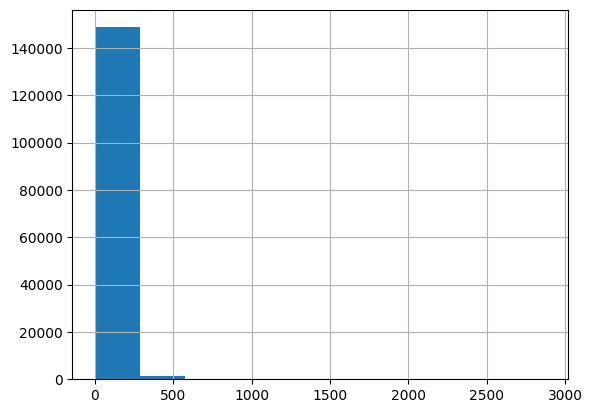

In [10]:
df.units_sold.hist()

In [11]:
df.drop('record_ID', axis = 1, inplace=True)

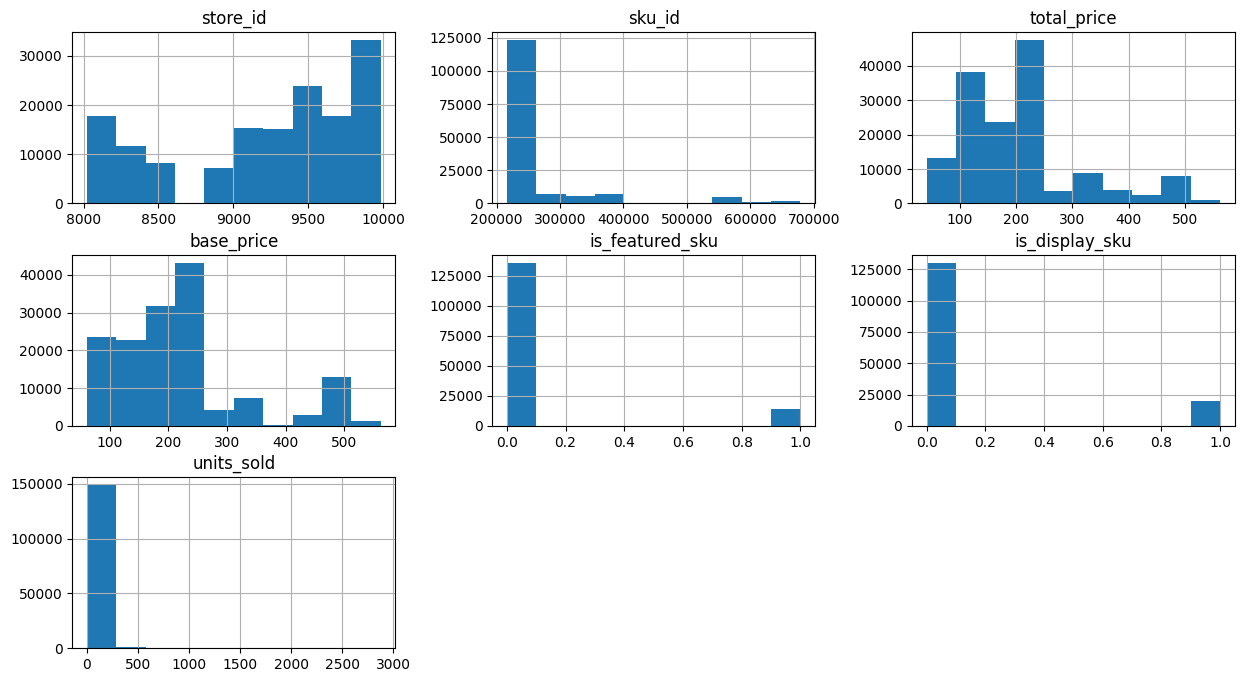

In [12]:
df.hist(figsize=(15,8))
plt.show()

Store ID and SKU ID are numbers of O(10^3) and O(10^5). Need one hot encoding on them to convert into categorical columns with 0s and 1s

In [13]:
df['store_id'].nunique()

76

In [14]:
df['sku_id'].nunique()

28

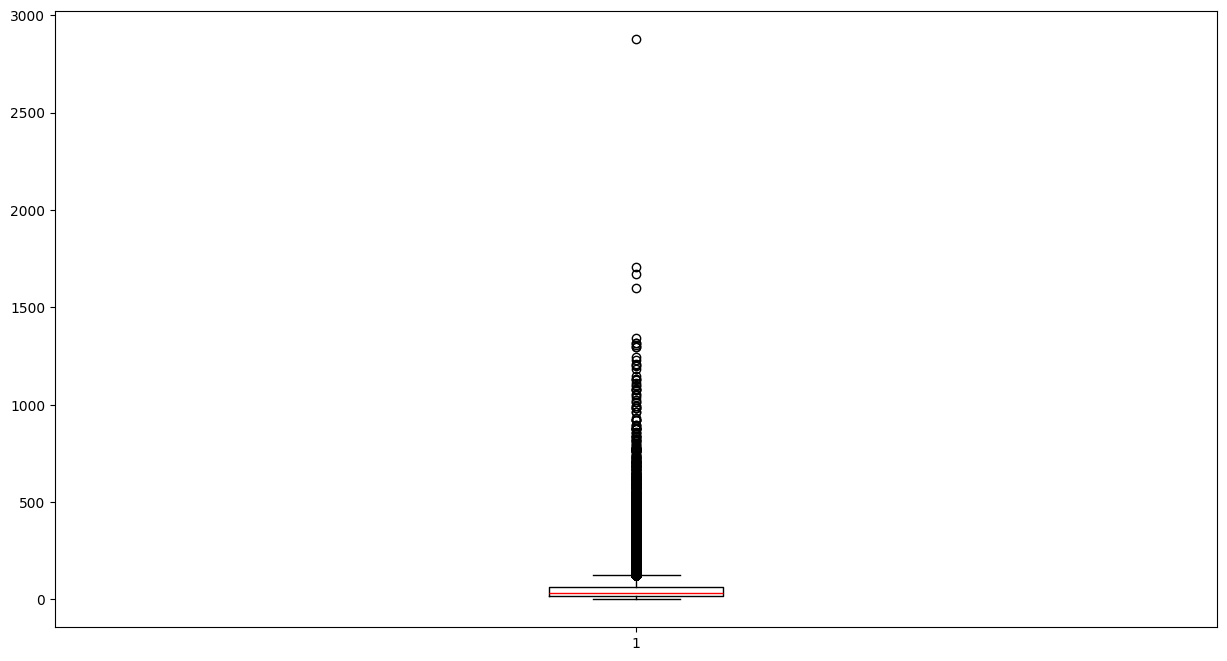

In [15]:
plt.figure(figsize = (15,8))
plt.boxplot(df['units_sold'], medianprops=dict(color='red'))
plt.show()

In [16]:
df.units_sold.quantile(0.99)

np.float64(283.0)

In [17]:
df[df.units_sold > 283].units_sold.count()

np.int64(1498)

In [18]:
df = df[df.units_sold < 283]

In [19]:
df = df.join(pd.get_dummies(df.store_id, prefix='store')).drop('store_id', axis=True)

In [20]:
df = df.join(pd.get_dummies(df.sku_id, prefix='sku')).drop('sku_id', axis=True)

In [21]:
df.head()

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,store_8058,...,sku_320485,sku_327492,sku_378934,sku_398721,sku_545621,sku_546789,sku_547934,sku_600934,sku_673209,sku_679023
0,99.0375,111.8625,0,0,20,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.0375,99.0375,0,0,28,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
2,133.9500,133.9500,0,0,19,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
3,133.9500,133.9500,0,0,44,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
4,141.0750,141.0750,0,0,52,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df.shape

(148635, 112)

Base learner as RF 

In [23]:
model = RandomForestRegressor(n_jobs = -1)

In [24]:
X, y = df.drop('units_sold', axis=1), df['units_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
model.score(X_test, y_test)

0.8267796883692147

Since there are large number of categorical columns we can use CatBoost for increasing accuracy score along with grid search CV

In [27]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor()
cat_model.fit(X_train, y_train)

Learning rate set to 0.087109
0:	learn: 41.7311821	total: 144ms	remaining: 2m 23s
1:	learn: 40.6972538	total: 158ms	remaining: 1m 18s
2:	learn: 39.7812194	total: 175ms	remaining: 58.3s
3:	learn: 38.9920976	total: 192ms	remaining: 47.7s
4:	learn: 38.3172523	total: 209ms	remaining: 41.5s
5:	learn: 37.7363006	total: 223ms	remaining: 37s
6:	learn: 37.1881431	total: 241ms	remaining: 34.2s
7:	learn: 36.6463337	total: 256ms	remaining: 31.8s
8:	learn: 36.2259828	total: 270ms	remaining: 29.7s
9:	learn: 35.8590872	total: 290ms	remaining: 28.7s
10:	learn: 35.4807771	total: 306ms	remaining: 27.5s
11:	learn: 35.1660052	total: 324ms	remaining: 26.7s
12:	learn: 34.8564776	total: 341ms	remaining: 25.9s
13:	learn: 34.5825618	total: 356ms	remaining: 25.1s
14:	learn: 34.3147401	total: 374ms	remaining: 24.5s
15:	learn: 34.0157462	total: 391ms	remaining: 24s
16:	learn: 33.7779280	total: 407ms	remaining: 23.6s
17:	learn: 33.5449283	total: 427ms	remaining: 23.3s
18:	learn: 33.3214410	total: 446ms	remaining: 

In [28]:
cat_model.score(X_test, y_test)

np.float64(0.8265546940882694)

Hyperparameter tuning

In [29]:
param_grid = {
        'iterations': [300,400,500],
        'learning_rate': [0.01, 0.05, 0.1],
        'depth': [8,10,12],
        'l2_leaf_reg': [1, 3, 5]
}
grid_search = GridSearchCV(estimator=cat_model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
0:	learn: 41.0880141	total: 106ms	remaining: 52.9s
1:	learn: 39.5282830	total: 218ms	remaining: 54.3s
2:	learn: 38.1455974	total: 350ms	remaining: 58s
3:	learn: 36.9698587	total: 473ms	remaining: 58.7s
4:	learn: 35.9695610	total: 668ms	remaining: 1m 6s
5:	learn: 35.0899106	total: 792ms	remaining: 1m 5s
6:	learn: 34.3171075	total: 895ms	remaining: 1m 3s
7:	learn: 33.5949743	total: 997ms	remaining: 1m 1s
8:	learn: 33.0030760	total: 1.1s	remaining: 59.8s
9:	learn: 32.4510152	total: 1.2s	remaining: 58.9s
10:	learn: 31.9256827	total: 1.3s	remaining: 57.9s
11:	learn: 31.4909468	total: 1.4s	remaining: 57s
12:	learn: 31.0918116	total: 1.51s	remaining: 56.7s
13:	learn: 30.7424781	total: 1.62s	remaining: 56.4s
14:	learn: 30.3858486	total: 1.75s	remaining: 56.6s
15:	learn: 30.0106994	total: 1.89s	remaining: 57.1s
16:	learn: 29.6926898	total: 1.99s	remaining: 56.4s
17:	learn: 29.3582870	total: 2.09s	remaining: 56.1s
18:	learn: 29.088176

,estimator,<catboost.cor...0023A77C7E240>
,param_grid,"{'depth': [8, 10, ...], 'iterations': [300, 400, ...], 'l2_leaf_reg': [1, 3, ...], 'learning_rate': [0.01, 0.05, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


In [31]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'depth': 12, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best score: 0.8491993775175954


In [32]:
grid_search.best_estimator_.fit(X_train, y_train)
grid_search.best_estimator_.score(X_test, y_test)

0:	learn: 41.0880141	total: 76.7ms	remaining: 38.3s
1:	learn: 39.5282830	total: 153ms	remaining: 38s
2:	learn: 38.1455974	total: 227ms	remaining: 37.6s
3:	learn: 36.9698587	total: 311ms	remaining: 38.5s
4:	learn: 35.9695610	total: 412ms	remaining: 40.8s
5:	learn: 35.0899106	total: 494ms	remaining: 40.7s
6:	learn: 34.3171075	total: 573ms	remaining: 40.4s
7:	learn: 33.5949743	total: 650ms	remaining: 40s
8:	learn: 33.0030760	total: 726ms	remaining: 39.6s
9:	learn: 32.4510152	total: 803ms	remaining: 39.4s
10:	learn: 31.9256827	total: 884ms	remaining: 39.3s
11:	learn: 31.4909468	total: 957ms	remaining: 38.9s
12:	learn: 31.0918116	total: 1.03s	remaining: 38.6s
13:	learn: 30.7424781	total: 1.11s	remaining: 38.7s
14:	learn: 30.3858486	total: 1.19s	remaining: 38.4s
15:	learn: 30.0106994	total: 1.26s	remaining: 38.2s
16:	learn: 29.6926898	total: 1.35s	remaining: 38.3s
17:	learn: 29.3582870	total: 1.42s	remaining: 38.1s
18:	learn: 29.0881762	total: 1.49s	remaining: 37.8s
19:	learn: 28.8435816	tot

np.float64(0.8618663233504944)

Prediction vs Actual

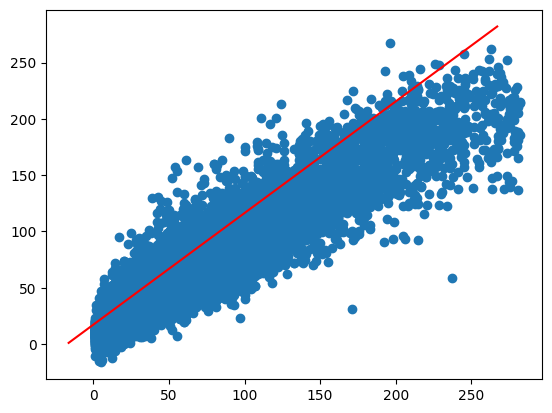

In [33]:
plt.scatter(y_test, grid_search.best_estimator_.predict(X_test))
plt.plot(np.linspace(grid_search.best_estimator_.predict(X_test).min(), grid_search.best_estimator_.predict(X_test).max()), np.linspace(y_test.min(), y_test.max()), color='red')